# Hydrogen Covariance matrix for capture cross section

First let's import `sandy` and the other python packages for formatting and postprocessing that are used in this notebook.

In [1]:
import sandy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Parsing the data in ENDF-6 format

The first thing that we want to do with an evaluated nuclear data file in ENDF-6 format is to load its content into python using `sandy`. By calling 
`sandy.get_endf_file` the ENDF-6 file is parsed and its content is split into text sections, each of them indexed by a unique combination of MAT, MF and MT numbers.

In [3]:
tape = sandy.get_endf6_file("jeff_33", 'xs', 10010)

## Create a `Sandy.XsCov` object

Class `sandy.XsCov` was developed to store and process covariance matrix.

The ASCII content in a `sandy.Endf6` instance can be directly imported into a `sandy.XsCov` instance using classmethod `.from_endf6`, where the `sandy.Endf6` object is passed as an argument.

In [4]:
cov = sandy.XsCov.from_endf6(tape)
cov.iloc[:10, :10]

MAT                        125                                      \
MT                           2                                       
E                  1.00000e-05 1.00000e+05 5.00000e+05 1.00000e+06   
MAT MT E                                                             
125 2  1.00000e-05 8.77542e-06 1.38849e-05 2.79801e-05 3.88661e-05   
       1.00000e+05 1.38849e-05 2.21044e-05 4.46560e-05 6.20404e-05   
       5.00000e+05 2.79801e-05 4.46560e-05 9.03092e-05 1.25482e-04   
       1.00000e+06 3.88661e-05 6.20404e-05 1.25482e-04 1.74360e-04   
       2.00000e+06 5.25229e-05 8.38345e-05 1.69565e-04 2.35628e-04   
       4.00000e+06 6.77747e-05 1.08156e-04 2.18749e-04 3.03993e-04   
       6.00000e+06 7.46362e-05 1.19094e-04 2.40870e-04 3.34743e-04   
       8.00000e+06 7.52854e-05 1.20119e-04 2.42937e-04 3.37618e-04   
       1.00000e+07 7.06024e-05 1.12637e-04 2.27794e-04 3.16594e-04   
       1.20000e+07 6.12297e-05 9.76802e-05 1.97555e-04 2.74561e-04   

MAT                                                                 \
MT                                                                   
E                  2.00000e+06 4.00000e+06 6.00000e+06 8.00000e+06   
MAT MT E                                                             
125 2  1.00000e-05 5.25229e-05 6.77747e-05 7.46362e-05 7.52854e-05   
       1.00000e+05 8.38345e-05 1.08156e-04 1.19094e-04 1.20119e-04   
       5.00000e+05 1.69565e-04 2.18749e-04 2.40870e-04 2.42937e-04   
       1.00000e+06 2.35628e-04 3.03993e-04 3.34743e-04 3.37618e-04   
       2.00000e+06 3.18450e-04 4.10889e-04 4.52472e-04 4.56393e-04   
       4.00000e+06 4.10889e-04 5.30241e-04 5.83960e-04 5.89030e-04   
       6.00000e+06 4.52472e-04 5.83960e-04 6.43158e-04 6.48730e-04   
       8.00000e+06 4.56393e-04 5.89030e-04 6.48730e-04 6.54433e-04   
       1.00000e+07 4.27988e-04 5.52378e-04 6.08404e-04 6.13741e-04   
       1.20000e+07 3.71159e-04 4.79053e-04 5.27657e-04 5.32291e-04   

MAT                                         
MT                                          
E                  1.00000e+07 1.20000e+07  
MAT MT E                                    
125 2  1.00000e-05 7.06024e-05 6.12297e-05  
       1.00000e+05 1.12637e-04 9.76802e-05  
       5.00000e+05 2.27794e-04 1.97555e-04  
       1.00000e+06 3.16594e-04 2.74561e-04  
       2.00000e+06 4.27988e-04 3.71159e-04  
       4.00000e+06 5.52378e-04 4.79053e-04  
       6.00000e+06 6.08404e-04 5.27657e-04  
       8.00000e+06 6.13741e-04 5.32291e-04  
       1.00000e+07 5.75582e-04 4.99212e-04  
       1.20000e+07 4.99212e-04 4.32971e-04

The `pd.DataFrame`contains the energy-dependent covariance matrix for cross sections in hydrogen.

## Filter the covariance matrix

The covariance data can be filtered by MAT and MT numbers using method `get_section`, to make sure that the returned object still is a `EnergyCov` object).

### Capture cross section

In [5]:
capture_cov = cov.get_section(125, 102, 125, 102)

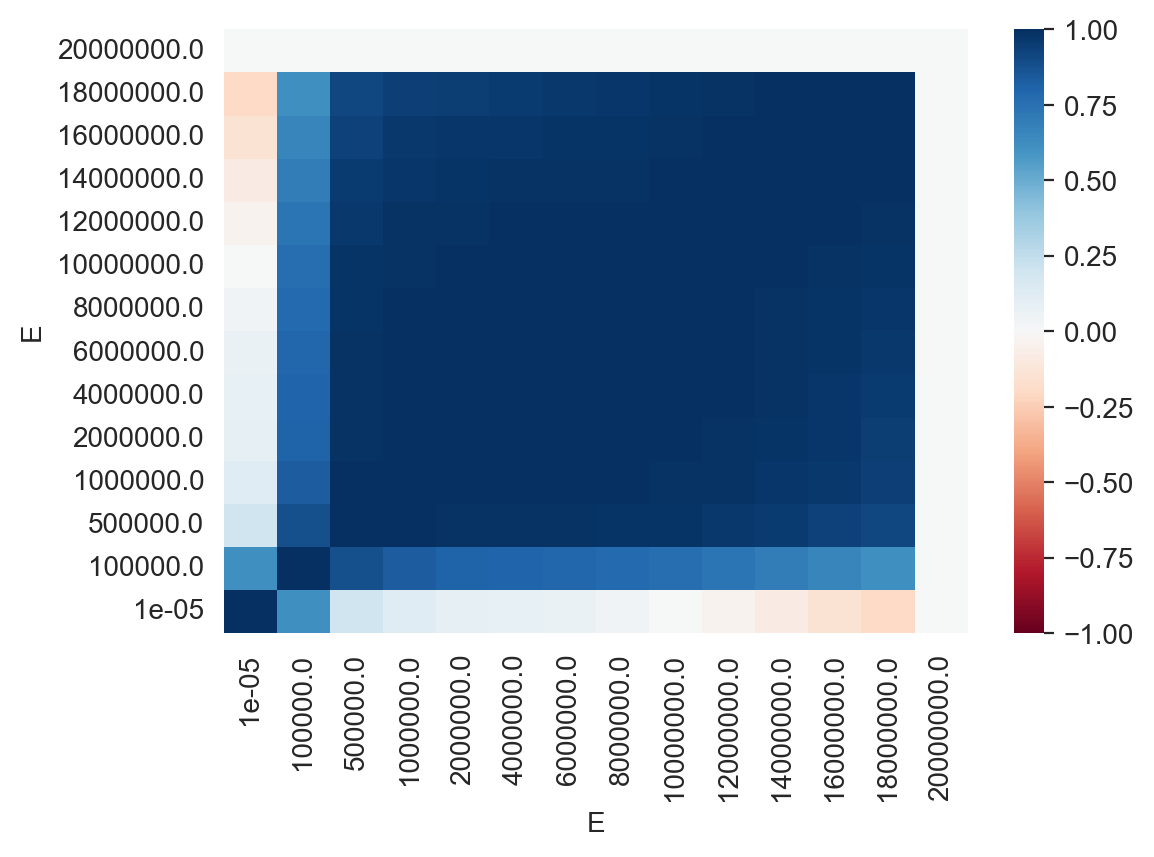

In [6]:
fig, ax = plt.subplots(dpi=200)
capture_cov.plot_corr(ax=ax)
ax.invert_yaxis()

### Elastic scattering cross section

In [7]:
elastic_cov = cov.get_section(125, 2, 125, 2)

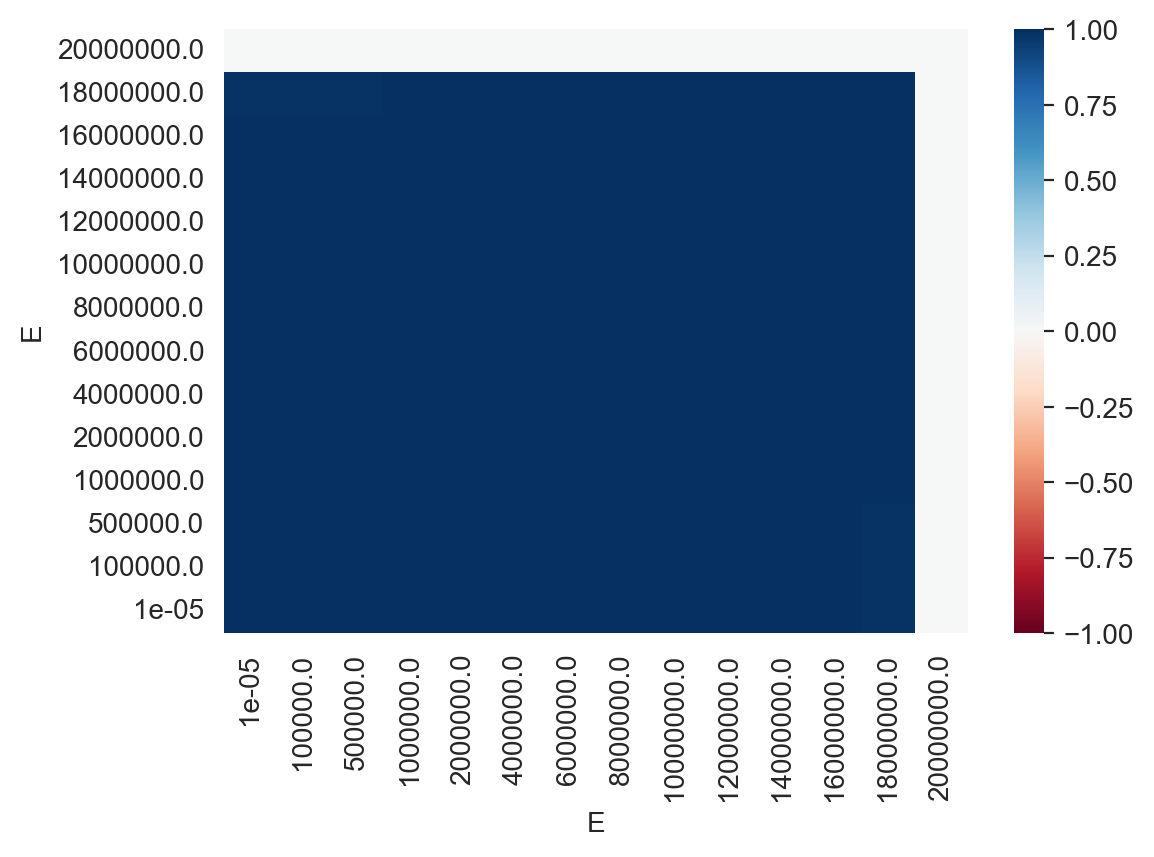

In [8]:
fig, ax = plt.subplots(dpi=200)
elastic_cov.plot_corr(ax=ax)
ax.invert_yaxis()